In [3]:
%pylab inline
from matplotlib import pyplot as plt
import seaborn
import pandas as pd
from yahoo_finance import Share
import datetime
from datetime import datetime
import numpy as np
import itertools

Populating the interactive namespace from numpy and matplotlib


/home/ubuntu/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [4]:
import get_spread as gs

In [5]:
import sys

In [6]:
sys.path.append('..')

In [5]:
import get_symbols
symbols = get_symbols.main()

/home/ubuntu/anaconda3/lib/python3.5/site-packages/pandas/io/data.py:33: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


In [6]:
def get_dailyret(ser):
    return (ser.shift(-1) - ser)/ser

In [7]:
pricedata = pd.DataFrame()
returndata = pd.DataFrame()
for symbol in symbols:
    try:
        data = pd.read_pickle('../data/pricedata/'+symbol+'_2007-05-022015-12-31')
        
    except:
        print('notfound')
    pricedata[symbol] = data.Close
    returndata[symbol] = get_dailyret(data.Close)

notfound
notfound
notfound
notfound
notfound
notfound
notfound
notfound
notfound


In [8]:
price_corr = pricedata.corr()
price_cov = pricedata.cov()
return_corr = returndata.corr()
return_cov = returndata.cov()

In [23]:
price_corr['AAPL']['APC']

0.67585447348661765

In [31]:
symbols_small = symbols[:50]
spreads = pd.DataFrame()
for symbol, symbol2 in itertools.combinations(symbols_small,2):
    if return_corr[symbol][symbol2] > .5:
        spreadname = '-'.join((symbol,symbol2))
        print(spreadname)
        spread = gs.get_spread(returndata[symbol],returndata[symbol2] )
        spreads[spreadname] = spread

ACN-ADP
ACN-CA
ACN-CSCO
ACN-CTSH
ACN-EMC
ACN-FISV
ACN-IBM
ACN-LLTC
ACN-ORCL
ACN-PAYX
ATVI-EA
ADBE-GOOGL
ADBE-ADI
ADBE-AMAT
ADBE-ADSK
ADBE-ADP
ADBE-CA
ADBE-CSCO
ADBE-CTXS
ADBE-CTSH
ADBE-EBAY
ADBE-EMC
ADBE-FIS
ADBE-FISV
ADBE-HRS
ADBE-IBM
ADBE-INTU
ADBE-JNPR
ADBE-KLAC
ADBE-LRCX
ADBE-LLTC
ADBE-MCHP
ADBE-ORCL
ADBE-PAYX
ADS-PYPL
GOOGL-GOOG
GOOGL-AAPL
GOOGL-ADP
GOOGL-CSCO
GOOGL-EBAY
GOOGL-FISV
GOOGL-ORCL
GOOG-FB
GOOG-MA
ADI-AMAT
ADI-ADSK
ADI-ADP
ADI-AVGO
ADI-CA
ADI-CSCO
ADI-CTSH
ADI-EBAY
ADI-EMC
ADI-FISV
ADI-HRS
ADI-IBM
ADI-INTU
ADI-JNPR
ADI-KLAC
ADI-LRCX
ADI-LLTC
ADI-MCHP
ADI-MU
ADI-MSFT
ADI-MSI
ADI-NTAP
ADI-NVDA
ADI-ORCL
ADI-PAYX
ADI-QRVO
ADI-QCOM
AAPL-EMC
AAPL-ORCL
AAPL-PYPL
AMAT-ADSK
AMAT-ADP
AMAT-AVGO
AMAT-CA
AMAT-CSCO
AMAT-CTSH
AMAT-EBAY
AMAT-EMC
AMAT-FISV
AMAT-HRS
AMAT-IBM
AMAT-INTU
AMAT-JNPR
AMAT-KLAC
AMAT-LRCX
AMAT-LLTC
AMAT-MCHP
AMAT-MU
AMAT-MSFT
AMAT-MSI
AMAT-NTAP
AMAT-NVDA
AMAT-ORCL
AMAT-PAYX
ADSK-ADP
ADSK-CA
ADSK-CSCO
ADSK-CTXS
ADSK-CTSH
ADSK-EMC
ADSK-EQIX
ADSK-FFIV
ADSK-FISV
ADS

In [42]:
symbols_small = symbols
spreads = pd.DataFrame()
for symbol, symbol2 in itertools.combinations(symbols_small,2):
    if return_corr[symbol][symbol2] > .85:
        spreadname = '-'.join((symbol,symbol2))
        print(spreadname)
        spread = gs.get_spread(returndata[symbol],returndata[symbol2] )
        spreads[spreadname] = spread

GOOGL-GOOG
EQIX-FFIV
HPQ-INTC
INTU-JNPR
INTU-KLAC
JNPR-KLAC
MU-MSFT
MU-MSI
MSFT-MSI
QRVO-QCOM
SWKS-SYMC
DISCA-DISCK
MAR-HOT
NWSA-NWS
FOXA-FOX
CVX-COP
CVX-XOM
AVB-BXP
AVB-EQR
AVB-ESS
AVB-FRT
AVB-KIM
AVB-PSA
AVB-SPG
AVB-VNO
BXP-EQR
BXP-FRT
BXP-HST
BXP-KIM
BXP-PSA
BXP-SPG
BXP-VNO
EQR-ESS
EQR-FRT
EQR-HCP
EQR-KIM
EQR-PSA
EQR-SPG
EQR-VNO
FRT-KIM
FRT-PSA
FRT-SPG
FRT-VNO
HCP-PSA
HCP-SPG
HCP-VTR
HCP-VNO
HCP-HCN
HST-VNO
KIM-PSA
KIM-SPG
KIM-VNO
PLD-SPG
PLD-VNO
PSA-O
PSA-SPG
PSA-VNO
SPG-VNO
SLG-VNO
VTR-HCN
WY-WLTW


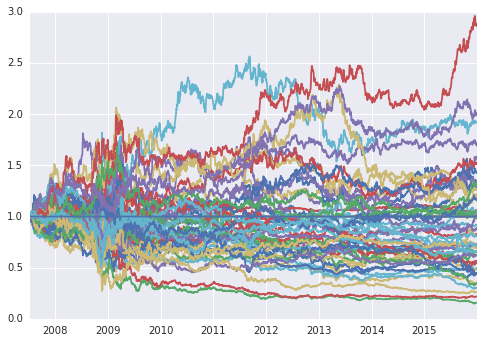

In [43]:
plot(np.cumprod(spreads+1))

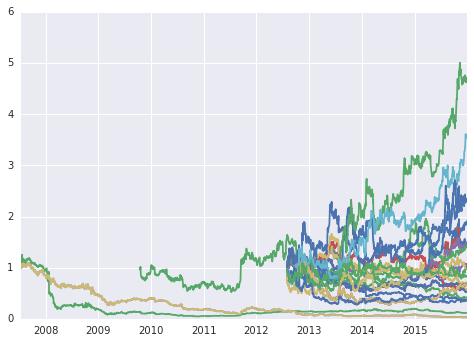

In [35]:
plot(np.cumprod(spreads+1))

In [1]:
print('hi')

hi


In [13]:
spreads['g-c'] = gs.get_spread(returndata['GS'], returndata['C'])

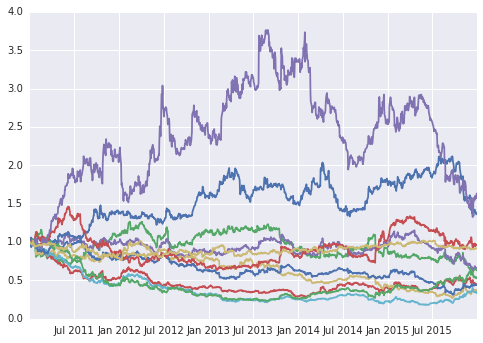

In [14]:
plot(np.cumprod(spreads['2011':]+1))

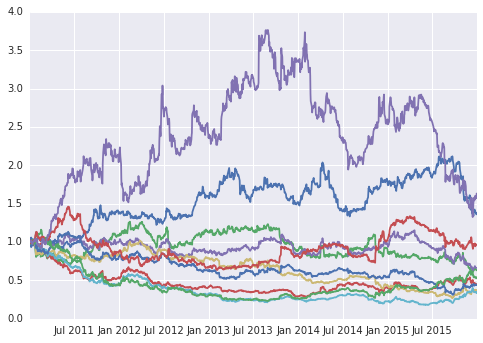

In [12]:
plot(np.cumprod(spreads['2011':]+1))

In [2]:
import numpy as np

In [1]:
np.linalg.eig(return_cov)

NameError: name 'np' is not defined

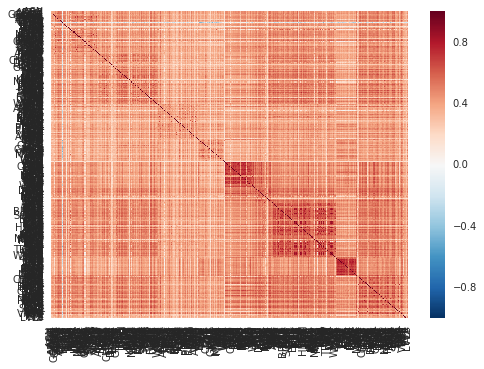

In [30]:
seaborn.heatmap(return_corr)

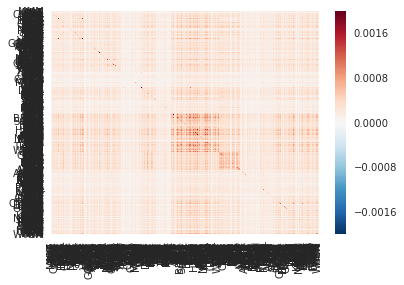

In [67]:
seaborn.heatmap(return_cov, vmax=.002)

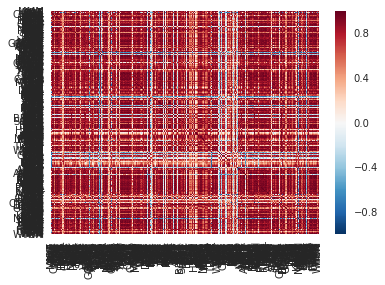

In [63]:
seaborn.heatmap(price_corr)

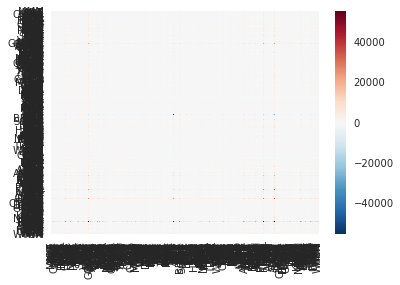

In [92]:
seaborn.heatmap(price_cov,vmax=8000)

In [89]:
for x in price_corr:
    for y in price_corr[x]:
    #print(x)
        if y >189257:
            print(x,y)

In [87]:
price_cov['PCLN'].argmax()

'PCLN'

In [90]:
price_corr.max().max()

1.0

In [3]:
def get_ticker_data(strat):
    ''' this should have parameters
        date range
        type of smooth val (which function)
    '''
    start = '2007-05-02'
    end = '2015-12-31'
  
    
    data = pd.DataFrame(Share(strat).get_historical(start, end))
    print('fetched data')
    data.Date = [datetime.strptime(data.Date.iloc[i], '%Y-%m-%d') for i in data.index]
    data.index = data.Date
    data = data.iloc[::-1]
    data.Close = [float(x) for x in data.Adj_Close]
    return data

In [4]:
def get_dailyret(ser):
    return (ser.shift(-1) - ser)/ser

In [7]:
gs = get_ticker_data('GS')
citi = get_ticker_data('C')

gs = gs.Close
citi = citi.Close

fetched data
fetched data


In [9]:
gs_ret = get_dailyret(gs)
citi_ret = get_dailyret(citi)

In [33]:
ser = gs_ret + price_ratio*citi_ret

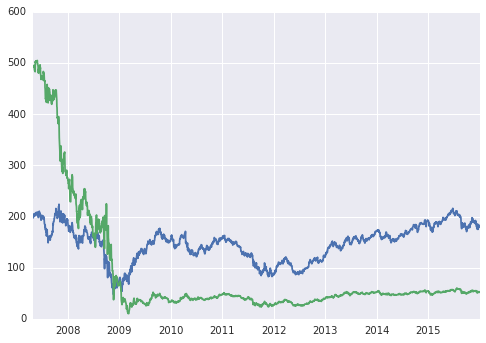

In [13]:
plot(gs)
plot(citi)

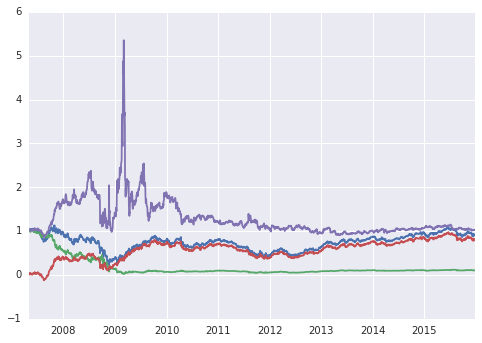

In [18]:
plot(np.cumprod(gs_ret+1))
plot(np.cumprod(citi_ret+1))
plot(np.cumprod(gs_ret+1)-np.cumprod(citi_ret+1))
plot(np.cumprod(gs_ret-citi_ret+1))

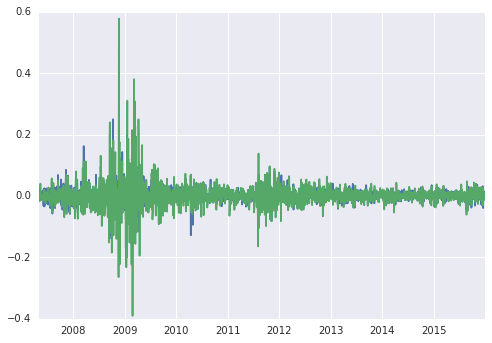

In [20]:
plot(gs_ret)
plot(citi_ret)

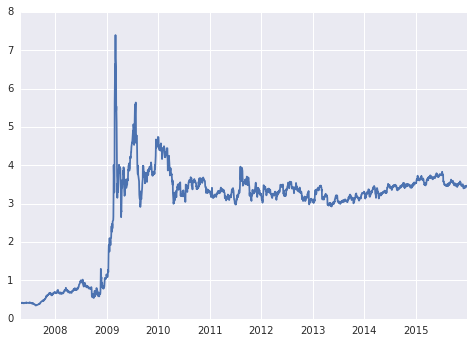

In [18]:
plot(price_ratio)

In [9]:
#dollar neutral
price_ratio = gs/citi

In [14]:
#beta neutral
hedge_ratio = gs-citi

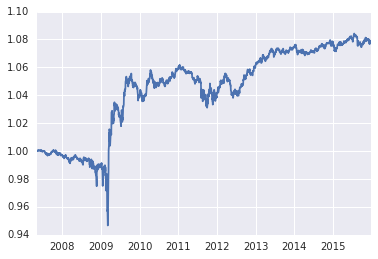

In [34]:
plot(np.cumprod(ser/100 + 1))

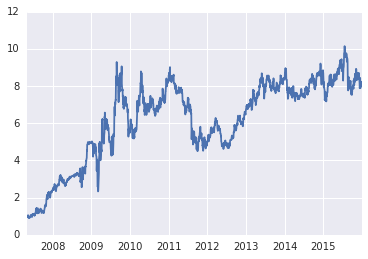

In [30]:
plot(np.cumprod(ser/100 + 1))

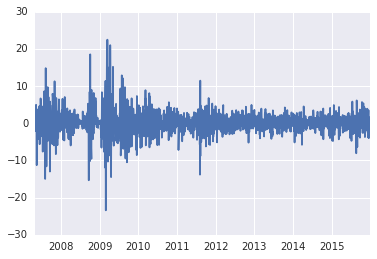

In [26]:
plot(ser)

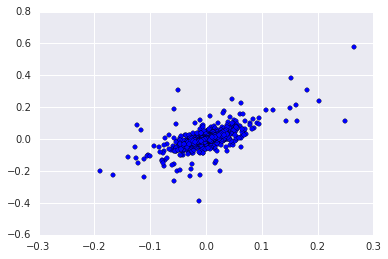

In [32]:
plt.scatter(gs_ret, citi_ret)

In [10]:
ser = gs_ret-citi_ret

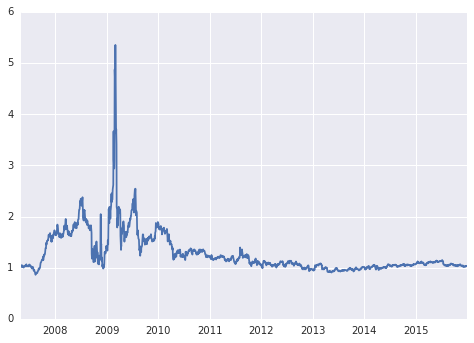

In [12]:
plot(np.cumprod(ser+1))

In [24]:
hedge_std = pd.rolling_std(gs_ret, 50)/pd.rolling_std(citi_ret,50)

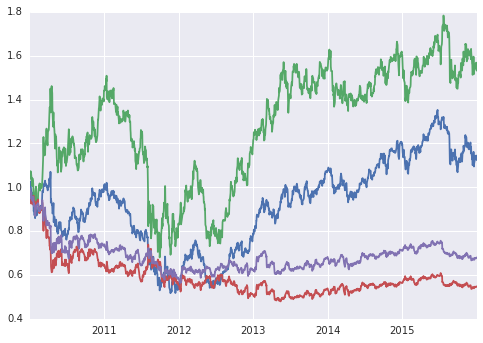

In [31]:
plot(np.cumprod(gs_ret['2010':]+1))
plot(np.cumprod(citi_ret['2010':]+1))
plot(np.cumprod(gs_ret['2010':]-citi_ret['2010':]+1))
plot(np.cumprod(gs_ret['2010':]-citi_ret['2010':] * hedge_std['2010':]+1))

#plot(np.cumprod(gs_ret['2010':]+1))

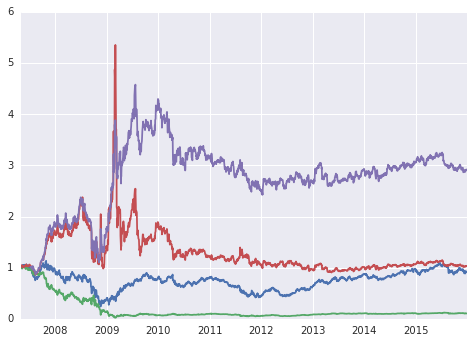

In [32]:
plot(np.cumprod(gs_ret+1))
plot(np.cumprod(citi_ret+1))
plot(np.cumprod(gs_ret-citi_ret+1))
plot(np.cumprod(gs_ret-citi_ret * hedge_std+1))